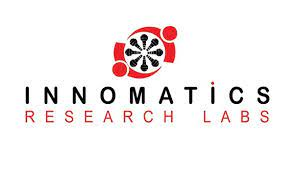

# INTERNSHIP PROJECT

# DATA SCIENCE INTERN - OCTOBER 2021 

# ABHISHEK MURTHY 

# INTRODUCTION

A census is the procedure of systematically calculating, acquiring and recording information about the members of a given population. This term is used mostly in connection with national population and housing censuses; other common censuses include the census of agriculture, and other censuses such as the traditional culture, business, supplies, and traffic censuses.

 Abstract  Adult dataset has 48842 instances and 15 attributes. The last one is the qualitative attribute which is called  ‘income’ in the code.The job is to predict each adult’s income potential and classify them according to the  quantitative attributes.There are different methods and thoughts about the raw data  influencing the final predicting results.


# DATASET DESCRIPTION

This dataset is also called "Census Income" dataset. There are 48842 instances with 14  quantitative attributes and 1 qualitative attribute which all clearly describing its meaning. 14 quantitative attributes:  'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',' occupation', 'relationship', 'race', 'sex', 'capital gain', 'capital-loss', 'hours-per-week', 'native-country'. Qualitative attribute: 'income'. ‘income’ has two values which is  ‘<=50k’ (less or equal to 50k/yr) and ‘>50k’ (more than 50k/yr). The quantitative attributes are the features and the  qualitative attribute is the target. 
There are 9 attributes are ‘string’ within raw data: ‘workclass’, ‘education’, ‘marital-status’, ‘occupation’, ‘relationship’,  ‘race’, ‘sex’,’ native-country’ and ’income’ which are must be converted to numeric in order to let network learn. Thus,  each different value of these attributes is arranged as a number. Particularly, ‘<=50k’ ‘income’ is 0 and ‘>50k’ is 1

# OBJECTIVE OF THE PROJECT


 The goal of this Machine Learning project is to predict whether a person makes over 50k a year or not given their demographic variation this is a classification problem.




# Importing Neccessary Libraries

In [1]:
# It Will ignore some unneccessery warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Importing Data Set¶

In [3]:
df = pd.read_csv("C:/Users/Abhi/Desktop/adult.csv")

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info

<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marr

In [6]:
# Numerical Columns
numerical_data = df.select_dtypes(['int64'])
numerical_cols = numerical_data.columns
print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [7]:
# Categorical Columns
categorical_data = df.select_dtypes(['object'])
categorical_cols = categorical_data.columns
print('Categotical Columns : {}'.format(list(categorical_cols)))

Categotical Columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [8]:
df.shape

(48842, 15)

In [9]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Univariate Analysis

In [14]:
def plot(clm):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[clm])
    plt.axvline(df[clm].mean(), color="brown", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.subplot(1, 2, 2)
    sns.histplot(df[clm])
    plt.axvline(df[clm].mean(), color="black", label="Mean")
    plt.legend(shadow=True,fontsize="larger")

    skew = df[clm].skew()
    kurt = df[clm].kurt()
    print('Skewness:{}'.format(round(skew,2)))
    print('Kurtosis:{}'.format(round(kurt,2)))

# Age distribution

Skewness:0.56
Kurtosis:-0.19


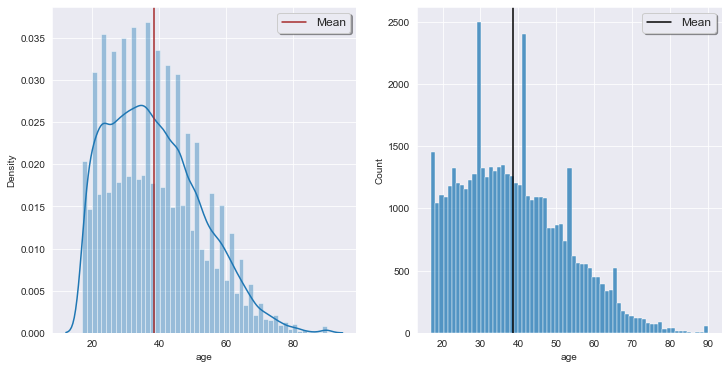

In [15]:
plot('age')

# From the above plots as we can say that it's having a thick tail towards the right side looks like a positively skewed distribution

Distribution of fnlwgt:

Skewness:1.44
Kurtosis:6.06


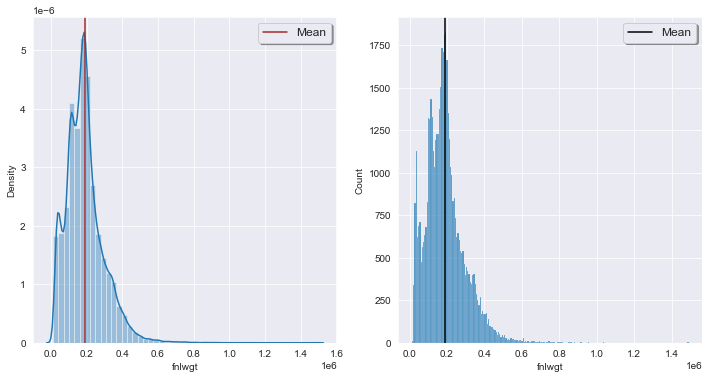

In [16]:
 plot('fnlwgt')

# From the above plots as we can say that it's having a long tail towards the right side looks like a log normal distribution

Distribution of educational-num:

Skewness:-0.31
Kurtosis:0.62


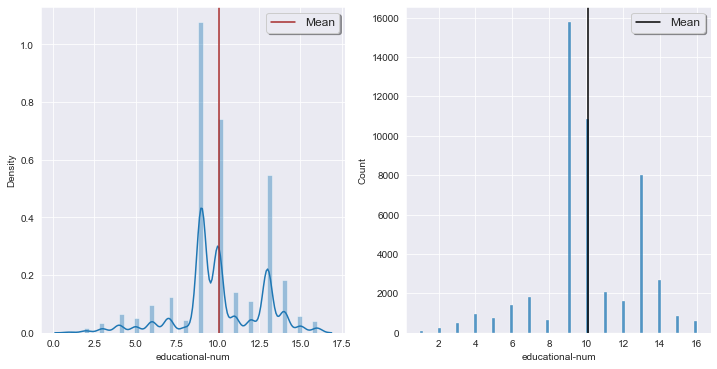

In [17]:
 plot('educational-num')

# capital-gain Distribution:

Skewness:11.89
Kurtosis:152.53


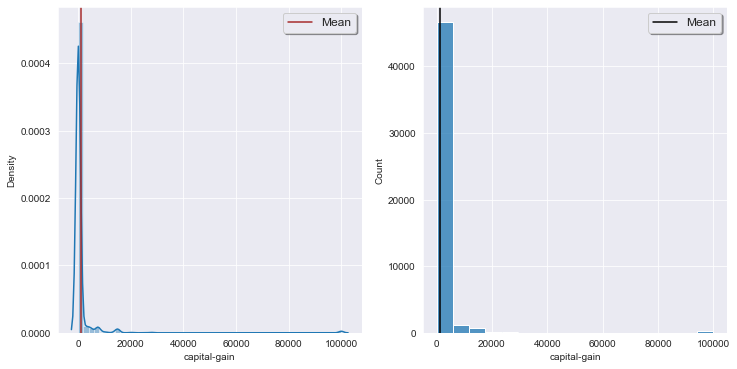

In [18]:
 plot('capital-gain')

# From the above plots as we can say that it's having a long tail towards the right side looks like a Pareto distribution

Distribution of capital-loss

Skewness:4.57
Kurtosis:19.99


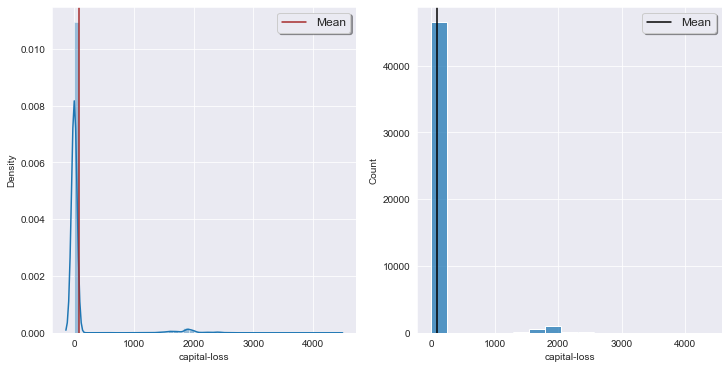

In [19]:
 plot('capital-loss')

# From the above plots as we can say that it's having a long tail towards the right side looks like a Pareto distribution

Distribution of hours-per-week

Skewness:0.24
Kurtosis:2.95


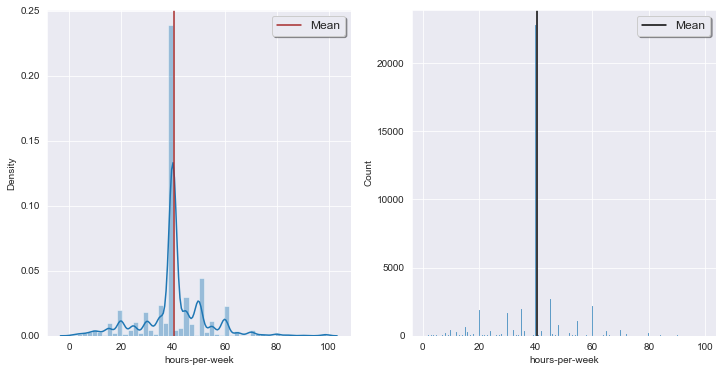

In [20]:
 plot('hours-per-week')

# Ploting the workclass to find the count

In [21]:
df['workclass']

0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48790, dtype: object

In [22]:
unique_workclass = df['workclass'].unique()
len(unique_workclass) 

9

In [23]:
workclass_count = df['workclass'].value_counts()
workclass_count

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Text(0, 0.5, 'Count')

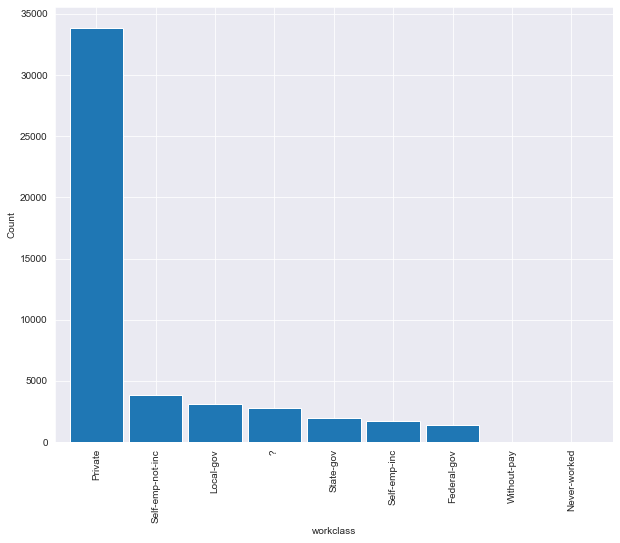

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
workclass_count.plot(kind='bar' , width=0.9)
plt.xlabel('workclass')
plt.ylabel('Count')

# From the above plot We can say the majority of Workclass belongs to the Private Sector. Very few percent of Workclass belongs to other categories.

Ploting the education to find the count

In [25]:
df['education']

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48790, dtype: object

In [26]:
unique_education = df['education'].unique()
len(unique_education) 

16

In [27]:
education_count = df['education'].value_counts()
education_count

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

Text(0, 0.5, 'Count')

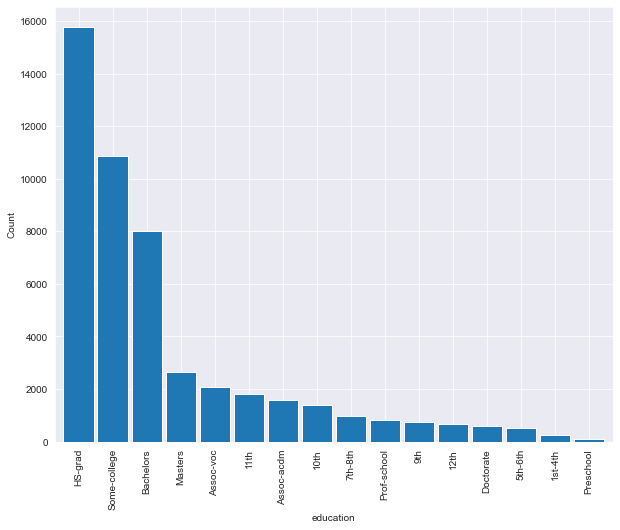

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
education_count.plot(kind='bar' , width=0.9)
plt.xlabel('education')
plt.ylabel('Count')

# From the above plot We can say that Highest Education level of an Individual is HS-grad.

Ploting the marital-status to find the count

In [29]:
df['marital-status']

0             Never-married
1        Married-civ-spouse
2        Married-civ-spouse
3        Married-civ-spouse
4             Never-married
                ...        
48837    Married-civ-spouse
48838    Married-civ-spouse
48839               Widowed
48840         Never-married
48841    Married-civ-spouse
Name: marital-status, Length: 48790, dtype: object

In [30]:
unique_maritalstatus = df['marital-status'].unique()
len(unique_maritalstatus)

7

In [31]:
maritalstatus_count = df['marital-status'].value_counts()
maritalstatus_count

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

Text(0, 0.5, 'Count')

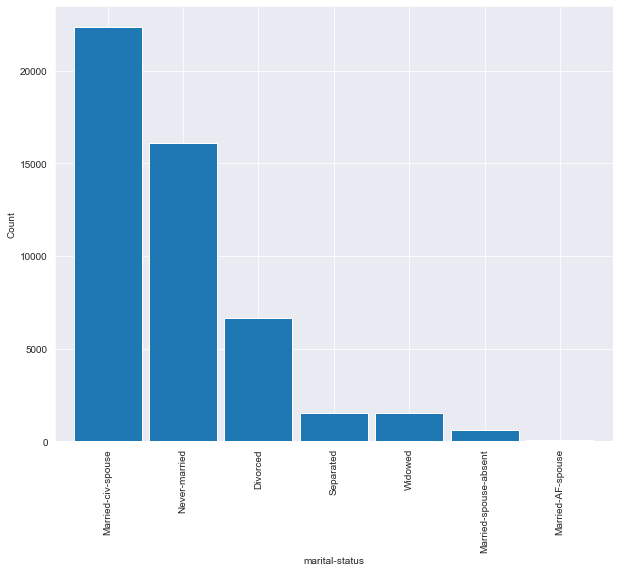

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
maritalstatus_count.plot(kind='bar' , width=0.9)
plt.xlabel('marital-status')
plt.ylabel('Count')

In [33]:
df['occupation']

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48790, dtype: object

In [34]:
unique_occupation = df['occupation'].unique()
len(unique_occupation)

15

In [35]:
 occupation_count = df['occupation'].value_counts()
occupation_count

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

Text(0, 0.5, 'Count')

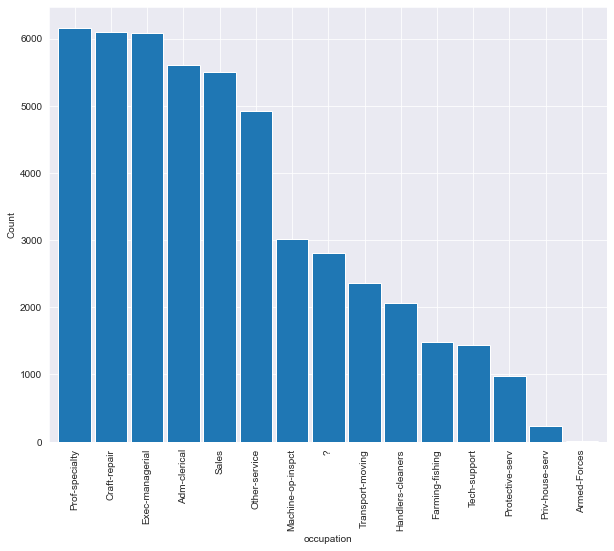

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
occupation_count.plot(kind='bar' , width=0.9)
plt.xlabel('occupation')
plt.ylabel('Count')

# From the above plot we can say that the most of the occupation follows is Prof-specialty

Ploting the relationship to find the count

In [37]:
df['relationship']

0        Own-child
1          Husband
2          Husband
3          Husband
4        Own-child
           ...    
48837         Wife
48838      Husband
48839    Unmarried
48840    Own-child
48841         Wife
Name: relationship, Length: 48790, dtype: object

In [38]:
unique_relationship = df['relationship'].unique()
len(unique_relationship)

6

In [39]:
relationship_count = df['relationship'].value_counts()
relationship_count

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

Text(0, 0.5, 'Count')

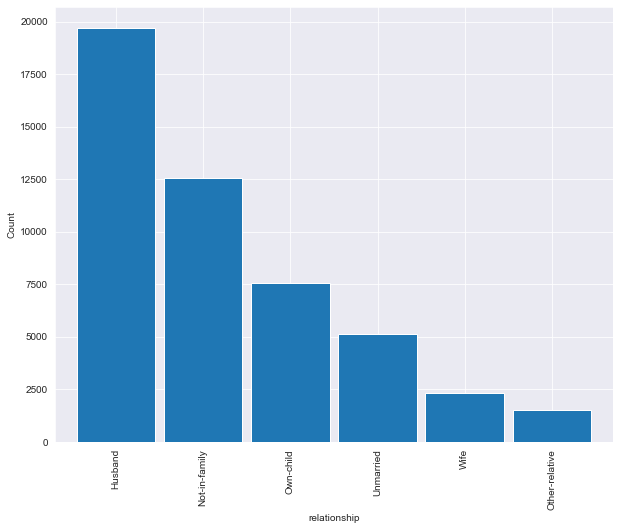

In [40]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
relationship_count.plot(kind='bar' , width=0.9)
plt.xlabel('relationship')
plt.ylabel('Count')

# Ploting the race to find the count:



In [41]:
df['race']

0        Black
1        White
2        White
3        Black
4        White
         ...  
48837    White
48838    White
48839    White
48840    White
48841    White
Name: race, Length: 48790, dtype: object

In [42]:
unique_race = df['race'].unique()
len(unique_race) 

5

In [43]:
race_count = df['race'].value_counts()
race_count

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

Text(0, 0.5, 'Count')

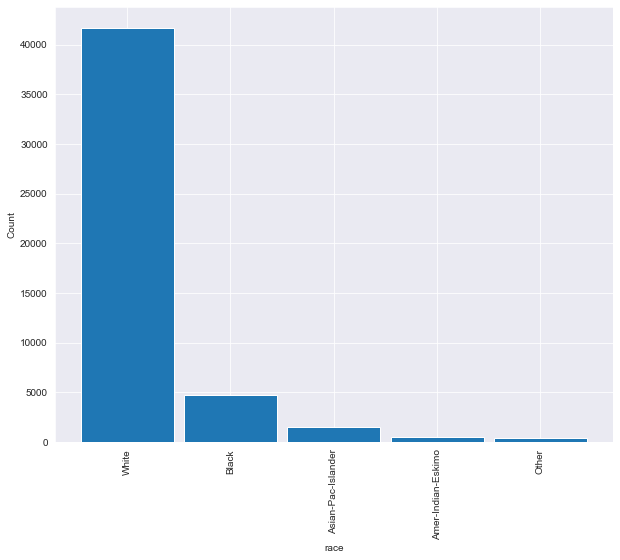

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
race_count.plot(kind='bar' , width=0.9)
plt.xlabel('race')
plt.ylabel('Count')

# Ploting the gender to find the count:

In [45]:
df['gender']

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: gender, Length: 48790, dtype: object

In [46]:
unique_gender = df['gender'].unique()
len(unique_gender) 

2

In [47]:
gender_count = df['gender'].value_counts()
gender_count

Male      32614
Female    16176
Name: gender, dtype: int64

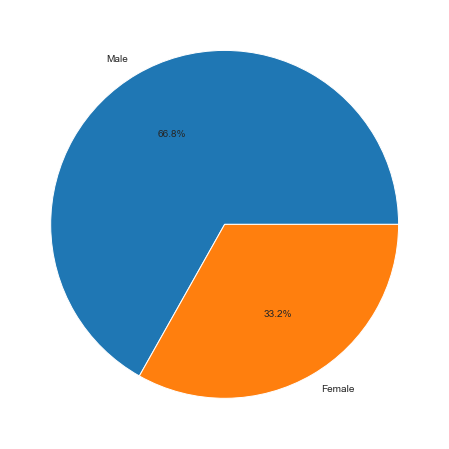

In [48]:
plt.figure(figsize=(15,8))
labels=['Male','Female']
data=df.gender.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

In [49]:
df['native-country']

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 48790, dtype: object

In [50]:
unique_native_country = df['native-country'].unique()
len(unique_native_country) 

42

In [51]:
native_country_count = df['native-country'].value_counts()
native_country_count

United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Text(0, 0.5, 'Count')

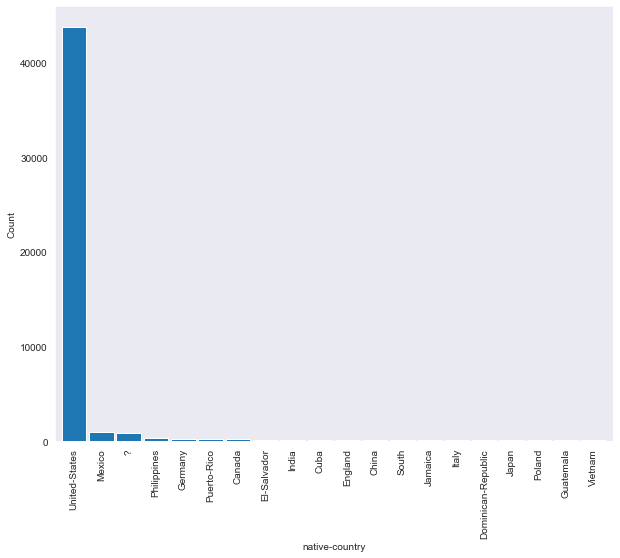

In [52]:
sns.set_style("dark")
plt.figure(figsize=(10,8))
native_country_count[:20].plot(kind='bar' , width=0.9)
plt.xlabel('native-country')
plt.ylabel('Count')

In [53]:
df['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48790, dtype: object

In [54]:
unique_income = df['income'].unique()
len(unique_income) 

2

In [55]:
income_count = df['income'].value_counts()
income_count

<=50K    37109
>50K     11681
Name: income, dtype: int64

Text(0, 0.5, 'Count')

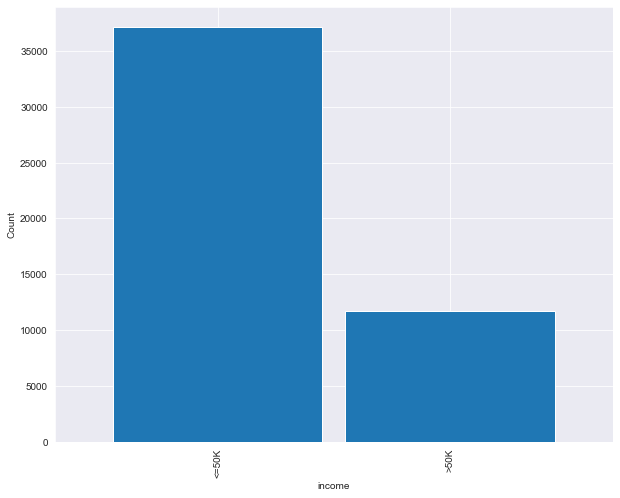

In [56]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
income_count.plot(kind='bar' , width=0.9)
plt.xlabel('income')
plt.ylabel('Count')

# Bivariate Analysis:

In [57]:
Workclass by Age Distribution:

SyntaxError: invalid syntax (<ipython-input-57-b8df60e70452>, line 1)

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y='workclass',x='age',data=df)
plt.title('Workclass by Age')
plt.show()

# Income with Respect to age:

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.countplot(x=df['age'][:200],hue='income',data=df)
plt.title('Income with Respect to age')
plt.show()

# Marital Status by Age Distribution

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='marital-status',y='age',ci=None,data=df)
plt.title('Marital Status with Respect to Age')
plt.xticks(rotation=45)
plt.show()

# Income with Respect to Relationship Status:

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='relationship',hue='income',data=df)
plt.title('Income with Respect to Relationship')
plt.show()

# Job Occupation with Respect to Income

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='occupation',hue='income',data=df)
plt.title('Income Distribution with Respect to Job Occupation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Income with Respect to Education Level:

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='education',hue='income',data=df)
plt.title('Income with Respect to Education')
plt.xticks(rotation=90)
plt.show()

# Feature Engineering:

# At the time of analysing the dataset we have came across with lot's of missing values. So now we have to tackel those to clean the data

In [58]:
# As we can see the null values are exists in the dataset as '?'. so I'll replace those with nan values.
columns = list(df.columns)
for col in columns:    
    df[col] = df[col].replace('?',np.nan)

In [59]:
df.isnull().any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [60]:
# Dropping the null values
df = df.loc[df['workclass'].notnull(), :]
df = df.loc[df['occupation'].notnull(), :]
df = df.loc[df['native-country'].notnull(), :]

In [61]:
df.isnull().any() 

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [62]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [63]:
# We can drop some unneccessary columns to keep our dataset clean
df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [64]:
#let's convert the value of the income column to get dummies
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [65]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Other-country'

In [66]:
df.loc[df['race'] != 'White', 'race'] = 'Other'

In [67]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,low
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,low
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,high
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,40,United-States,high
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,low


In [ ]:
numeric_data = df.select_dtypes(['int64','float64']).columns

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe
    
for column in list(numeric_data): # Iterating thorough each feature 
   
    q1 = df[column].quantile(0.25)  # first quartile
    q3 = df[column].quantile(0.75)  # third quartile
            
    iqr = q3 - q1 #Inter Quantile Range
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
     
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
        
    outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

# As we can see in the hours-per-week column there more outliers that we have to treat

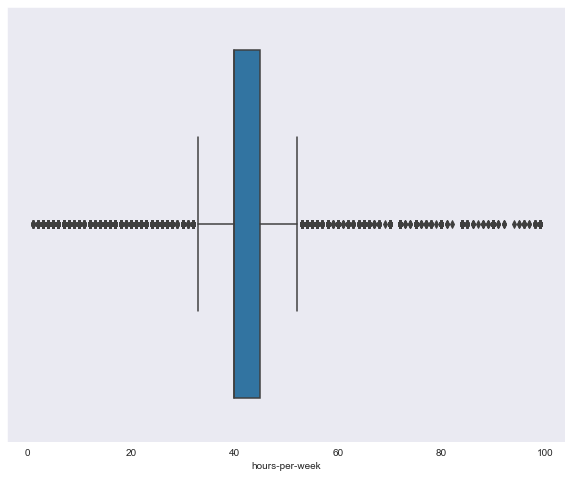

In [68]:
plt.figure(figsize=(10,8))
sns.set_style('dark')
sns.boxplot(df['hours-per-week'])
plt.show()

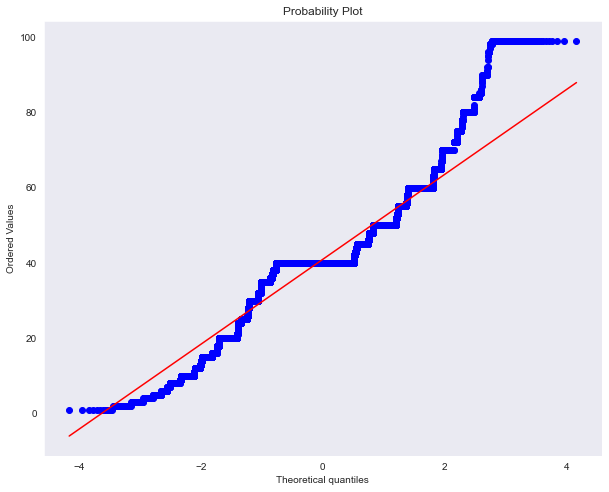

In [69]:
#let's plot a QQ plot to check the normality
plt.figure(figsize=(10,8))
sns.set_style('dark')
stats.probplot(df['hours-per-week'],dist='norm', plot=plt)
plt.show()

In [70]:
# Let's use boxcox transformation
pr_1 , l = stats.boxcox(df['hours-per-week'])
print(l)

0.9568515161108808


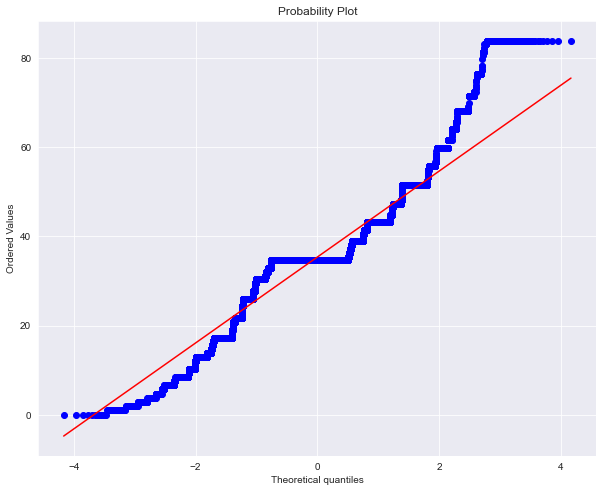

In [71]:
# Ploting the Q-Q plot to see the normality of the transformed column
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
stats.probplot(pr_1 , dist='norm' , plot=plt)
plt.show()

In [72]:
# Mean Imputation in column hours-per-week

q1 = df['hours-per-week'].quantile(0.25)
q3 = df['hours-per-week'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['hours-per-week'])
for i in df['hours-per-week']:
    if i > Upper_tail or i < Lower_tail:
            df['hours-per-week'] = df['hours-per-week'].replace(i, m)

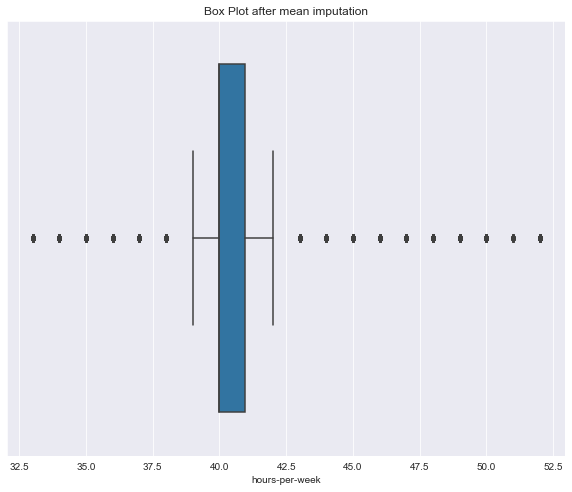

In [73]:
# Let's see the boxplot
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after mean imputation")
plt.show()

# Conclusion

# There were too much outliers in the columns which were treated well
There were missing values in the dataset as '?' which were treated
The data was pretty much skewed which I handled well
The dataset is now nit and clean to perform the machine learning

# Feature Transformation:

In [74]:
df.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

# Column Standardization for Numerical Features:

In [75]:
# Numerical Columns
numerical_data = df.select_dtypes(['int64','float64'])
numerical_cols = numerical_data.columns
print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['age', 'educational-num', 'hours-per-week']


In [76]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [77]:
numerical = df.select_dtypes(include=['int64', 'float64'])   
df_numerical = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)
df_numerical.head()

,age,educational-num,hours-per-week
0,0.109589,0.400000,0.368421
1,0.287671,0.533333,0.894737
2,0.150685,0.733333,0.368421
3,0.369863,0.600000,0.368421
4,0.232877,0.333333,0.418027


In [78]:
# One Hot Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [79]:
categorical = df.select_dtypes('object')
df_categorical = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))
df_categorical.head()

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use,

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [80]:
#Final dataset 
final_df = pd.concat([df_numerical,df_categorical], axis = 1)
final_df.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
0,0.109589,0.400000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.287671,0.533333,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.150685,0.733333,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.369863,0.600000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.232877,0.333333,0.418027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


# Splitting columns:

In [81]:
x = final_df.iloc[:,:-1] 
y = final_df.iloc[:,-1] #target variable

In [82]:
x

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States
0,0.109589,0.400000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.287671,0.533333,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.150685,0.733333,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.369863,0.600000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.232877,0.333333,0.418027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,0.136986,0.733333,0.263158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
45171,0.315068,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
45172,0.561644,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
45173,0.068493,0.533333,0.418027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [83]:
y

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
45170    1.0
45171    0.0
45172    1.0
45173    1.0
45174    0.0
Name: income_low, Length: 45175, dtype: float64

# Splitting the dataset into Train and Test data:

In [84]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3)

# Applying the Machine Learning Models:

Logistic Regression:

In [85]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression()

Logistic_model.fit(x_train, y_train)

y_pred_logistic = Logistic_model.predict(x_test)

from sklearn import metrics

Logistic_Acc= round(metrics.accuracy_score(y_test, y_pred_logistic),2)*100

Logistic_Acc

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

83.0

# DecisionTreeClassifier:

In [86]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(criterion='entropy',random_state=0)

DTC_model.fit(x_train,y_train)

y_pred_DTC = DTC_model.predict(x_test)

DTC_Acc = round(metrics.accuracy_score(y_test, y_pred_DTC),2)*100

DTC_Acc

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

77.0

# K Nearest Neighbour Classifier:

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(x_train,y_train)

y_pred_knn=knn_model.predict(x_test)

Knn_Acc = round(knn_model.score(x_test,y_test),2)*100

Knn_Acc

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


81.0

# Random Forest Classifier:

In [88]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

RF_model.fit(x_train, y_train)

y_pred_RF = RF_model.predict(x_test)

RF_Acc = round(RF_model.score(x_test,y_test),2)*100

RF_Acc

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_sta

80.0

# Extra Tree Classifier:

In [89]:
from sklearn.ensemble import ExtraTreesClassifier

ETC_model = ExtraTreesClassifier(n_estimators=100, random_state=0)

ETC_model.fit(x_train, y_train)

y_pred_ETC = ETC_model.predict(x_test)

ETC_Acc = round(ETC_model.score(x_test,y_test),2)*100

ETC_Acc

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

80.0

# Gradient Boosting Classifier:

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state = 0)

GBC_model.fit(x_train, y_train)

GBC_Acc = round(GBC_model.score(x_test,y_test),2)*100

GBC_Acc

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\

C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Abhi\

83.0

# Performance of each Model:

In [91]:
models = {
    'Logistic Regression':Logistic_Acc,
    'DecisionTreeClassifier':DTC_Acc,
    'KNeighborsClassifier':Knn_Acc,
    'RandomForestClassifier':RF_Acc,
    'ExtraTreesClassifier':ETC_Acc,
    'GradientBoostingClassifier':GBC_Acc,
}

models_score = pd.DataFrame.from_dict(data = models, orient='index',columns=['Score'])

models_score.sort_values(by='Score', ascending=False)

,Score
Logistic Regression,83.0
GradientBoostingClassifier,83.0
KNeighborsClassifier,81.0
RandomForestClassifier,80.0
ExtraTreesClassifier,80.0
DecisionTreeClassifier,77.0
